In [ ]:
import numpy
from numpy import cov
from numpy import trace
from numpy import iscomplexobj
from numpy import asarray
from numpy.random import randint
from scipy.linalg import sqrtm
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.datasets.mnist import load_data
from skimage.transform import resize

In [ ]:
# scale an array of images to a new size
def scale_images(images, new_shape):
	images_list = list()
	for image in images:
		new_image = resize(image, new_shape, 0)
		images_list.append(new_image)
	return asarray(images_list)

In [ ]:
def calculate_fid(model, images1, images2):
	act1 = model.predict(images1)
	act2 = model.predict(images2)
	mu1, sigma1 = act1.mean(axis=0), cov(act1, rowvar=False)
	mu2, sigma2 = act2.mean(axis=0), cov(act2, rowvar=False)
	ssdiff = numpy.sum((mu1 - mu2)**2.0)
	covmean = sqrtm(sigma1.dot(sigma2))
	if iscomplexobj(covmean):
		covmean = covmean.real
	fid = ssdiff + trace(sigma1 + sigma2 - 2.0 * covmean)
	return fid

In [ ]:
model = InceptionV3(include_top=False, pooling='avg', input_shape=(299,299,3))
images1 = randint(0, 255, 10*32*32*3)
images1 = images1.reshape((10,32,32,3))
images2 = randint(0, 255, 10*32*32*3)
images2 = images2.reshape((10,32,32,3))
print('Prepared', images1.shape, images2.shape)
images1 = images1.astype('float32')
images2 = images2.astype('float32')
images1 = scale_images(images1, (299,299,3))
images2 = scale_images(images2, (299,299,3))
print('Scaled', images1.shape, images2.shape)
images1 = preprocess_input(images1)
images2 = preprocess_input(images2)
fid = calculate_fid(model, images1, images1)
print('FID (same): %.3f' % fid)
fid = calculate_fid(model, images1, images2)
print('FID (different): %.3f' % fid)

87910968/87910968 [==============================] - 1s 0us/step
Prepared (10, 32, 32, 3) (10, 32, 32, 3)
Scaled (10, 299, 299, 3) (10, 299, 299, 3)
1/1 [==============================] - 1s 1s/step
FID (same): -0.000
1/1 [==============================] - 2s 2s/step
FID (different): 39.017


In [ ]:
!wget https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz
!wget https://www.robots.ox.ac.uk/~vgg/data/flowers/102/imagelabels.mat
!wget https://www.robots.ox.ac.uk/~vgg/data/flowers/102/setid.mat

--2023-04-24 17:17:00--  https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/datasets/flowers-102/102flowers.tgz [following]
--2023-04-24 17:17:01--  https://thor.robots.ox.ac.uk/datasets/flowers-102/102flowers.tgz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 344862509 (329M) [application/octet-stream]
Saving to: ‘102flowers.tgz.5’

102flowers.tgz.5    100%[===================>] 328.89M  31.6MB/s    in 13s     

2023-04-24 17:17:14 (26.0 MB/s) - ‘102flowers.tgz.5’ saved [344862509/344862509]

--2023-04-24 17:17:14--  https://www.robots.ox.ac.uk/~vgg/data/f

In [ ]:
!tar -xvf 102flowers.tgz

Streaming output truncated to the last 5000 lines.
jpg/image_02266.jpg
jpg/image_00062.jpg
jpg/image_05821.jpg
jpg/image_03712.jpg
jpg/image_01142.jpg
jpg/image_03033.jpg
jpg/image_05760.jpg
jpg/image_02732.jpg
jpg/image_00183.jpg
jpg/image_05264.jpg
jpg/image_03778.jpg
jpg/image_07061.jpg
jpg/image_04468.jpg
jpg/image_00676.jpg
jpg/image_07610.jpg
jpg/image_02192.jpg
jpg/image_05112.jpg
jpg/image_05638.jpg
jpg/image_00053.jpg
jpg/image_02451.jpg
jpg/image_05857.jpg
jpg/image_08033.jpg
jpg/image_03902.jpg
jpg/image_07494.jpg
jpg/image_02357.jpg
jpg/image_05496.jpg
jpg/image_04496.jpg
jpg/image_07538.jpg
jpg/image_01801.jpg
jpg/image_00326.jpg
jpg/image_07644.jpg
jpg/image_01199.jpg
jpg/image_01168.jpg
jpg/image_07020.jpg
jpg/image_05006.jpg
jpg/image_03484.jpg
jpg/image_02825.jpg
jpg/image_04549.jpg
jpg/image_02011.jpg
jpg/image_04360.jpg
jpg/image_06847.jpg
jpg/image_07695.jpg
jpg/image_03540.jpg
jpg/image_08058.jpg
jpg/image_01230.jpg
jpg/image_00096.jpg
jpg/image_01517.jpg
jpg/image

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")
drive.mount("/content/gdrive", force_remount=True)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Mounted at /content/gdrive


In [ ]:
from PIL import Image
import os
import numpy as np
count = 0
real = []
fake_ratgan = []
fake_model= []
for i in sorted(os.listdir("/content/jpg")):
    count += 1
    if count <= 1000:
        dir = "/content/jpg/" + i
        image = np.array(Image.open(dir))
        real.append(image)
    else:
        break

count = 0

for i in sorted(os.listdir("/content/gdrive/MyDrive/ratgan")):
    count+=1
    if count <= 1000:
        dir = "/content/gdrive/MyDrive/ratgan/" + i
        image = np.array(Image.open(dir))
        fake_ratgan.append(image)
    else:
        break


In [ ]:
real_images = scale_images(real, (64,64,3))
real_images = scale_images(real, (299,299,3))
fake_ratgan_images = scale_images(fake_ratgan, (64,64,3))
fake_ratgan_images = scale_images(fake_ratgan, (299,299,3))

In [ ]:
print(real_images.shape)
print(fake_ratgan_images.shape)

(1000, 299, 299, 3)
(1000, 299, 299, 3)


In [ ]:
!pip install torchmetrics
!pip install scipy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install torch-fidelity


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Identity Comparison

In [ ]:
import torch
_ = torch.manual_seed(3407)
from torchmetrics.image.kid import KernelInceptionDistance
from torchmetrics.image.fid import FrechetInceptionDistance
from torchmetrics.image.inception import InceptionScore
fid = FrechetInceptionDistance(feature=64)
kid = KernelInceptionDistance(subset_size=50)
inception = InceptionScore()

/usr/local/lib/python3.9/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `Kernel Inception Distance` will save all extracted features in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `InceptionScore` will save all extracted features in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)


In [ ]:
imgs_dist1 = torch.randint(0, 200, (100, 3, 299, 299), dtype=torch.uint8)
imgs_dist2 = torch.randint(100, 255, (100, 3, 299, 299), dtype=torch.uint8)
real = torch.Tensor(real_images).type(torch.uint8)
fake = torch.Tensor(fake_images).type(torch.uint8)
# real_batches = torch.split(real, 20, dim=0)
# fake_batches = torch.split(fake, 20, dim=0)

In [ ]:
real = real.permute(0,3,1,2)
fake = fake.permute(0,3,1,2)
real_batches = torch.split(real, 100, dim=0)
fake_batches = torch.split(fake, 100, dim=0)


In [ ]:
for batch in real_batches:
    fid.update(batch, real = True)

In [ ]:
for batch in fake_batches:
    fid.update(batch, real = False)

In [ ]:
fid.compute()

tensor(1.1471)

In [ ]:
for batch in real_batches:
    kid.update(batch, real = True)
for batch in fake_batches:
    kid.update(batch, real = False)

In [ ]:
kid.compute()

(tensor(0.0212), tensor(0.0085))

In [ ]:
for batch in fake_batches:
    inception.update(batch)
# inception.update(imgs_dist1)
inception.compute()

(tensor(2.8224), tensor(0.1752))

RatGAN Comparison

In [ ]:
fid = FrechetInceptionDistance(feature=64)
kid = KernelInceptionDistance(subset_size=50)
inception = InceptionScore()

/usr/local/lib/python3.9/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `Kernel Inception Distance` will save all extracted features in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `InceptionScore` will save all extracted features in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)


In [ ]:
fake_ratgan = torch.Tensor(fake_ratgan_images).type(torch.uint8)
fake_ratgan = fake_ratgan.permute(0,3,1,2)
fake_ratgan_batches = torch.split(fake_ratgan, 100, dim=0)


In [ ]:
for batch in real_batches:
    fid.update(batch, real = True)
for batch in fake_ratgan_batches:
    fid.update(batch, real = False)
fid.compute()

tensor(30.2377)

In [ ]:
for batch in real_batches:
    kid.update(batch, real = True)
for batch in fake_ratgan_batches:
    kid.update(batch, real = False)
kid.compute()

In [ ]:
for batch in fake_ratgan_batches:
    inception.update(batch)
# inception.update(imgs_dist1)
inception.compute()

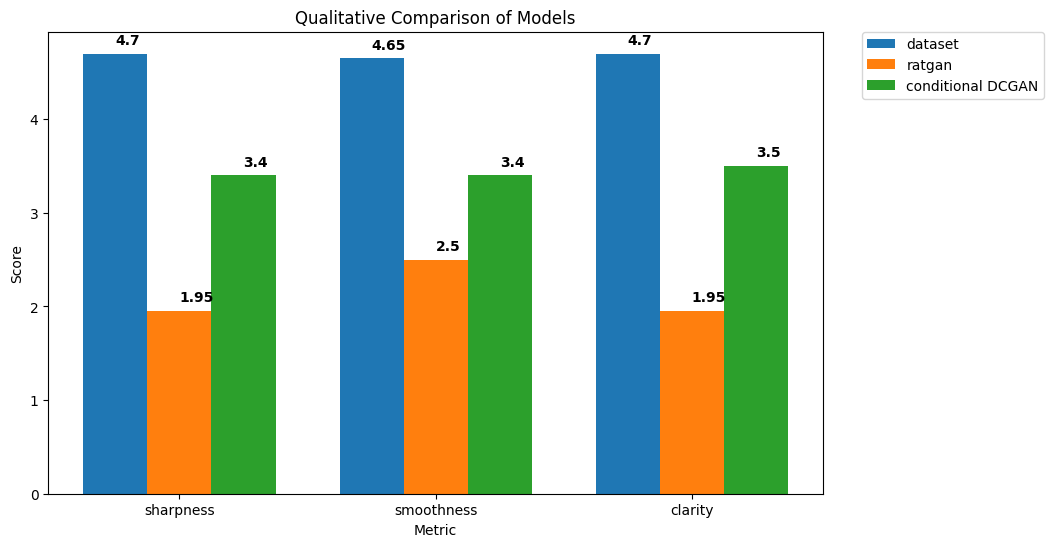

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Divide the data into groups of 3
dataset = [4.7, 4.65, 4.7]
ratgan = [1.95, 2.5, 1.95]
conditional_DCGAN = [3.4, 3.4, 3.5]

# Set up the x-axis labels and positions
metrics = ['sharpness', 'smoothness', 'clarity']
x_pos = np.arange(len(metrics))

# Set up the bar widths and positions
bar_width = 0.25
bar_dataset_pos = x_pos - bar_width
bar_ratgan_pos = x_pos
bar_conditional_DCGAN_pos = x_pos + bar_width

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars for the dataset, ratgan, and conditional_DCGAN groups
ax.bar(bar_dataset_pos, dataset, width=bar_width, label='dataset')
ax.bar(bar_ratgan_pos, ratgan, width=bar_width, label='ratgan')
ax.bar(bar_conditional_DCGAN_pos, conditional_DCGAN, width=bar_width, label='conditional DCGAN')

# Add labels to the bars
for i, v in enumerate(dataset):
    ax.text(bar_dataset_pos[i], v + 0.1, str(v), color='black', fontweight='bold')
for i, v in enumerate(ratgan):
    ax.text(bar_ratgan_pos[i], v + 0.1, str(v), color='black', fontweight='bold')
for i, v in enumerate(conditional_DCGAN):
    ax.text(bar_conditional_DCGAN_pos[i], v + 0.1, str(v), color='black', fontweight='bold')

# Add axis labels and legend
ax.set_xticks(x_pos)
ax.set_xticklabels(metrics)
ax.set_xlabel('Metric')
ax.set_ylabel('Score')
ax.set_title('Qualitative Comparison of Models')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()
